In [ ]:
pip install scikit-learn


In [3]:
from collections import Counter
import numpy as np
import pandas as pd
from requests import head
import seaborn as sns
import matplotlib.pyplot as plt 
import time
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from matplotlib import colormaps
import matplotlib.animation as animation
from sklearn.feature_extraction.text import CountVectorizer


In [9]:
import sys 
import os 

# Adicionando o diretório do projeto ao sys.path
project_path = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
sys.path.append(project_path)

import utilities.utilities as u

In [19]:
import re

# Função de limpeza de texto
def preprocess_text(text):
    # Remover pontuação, números e símbolos especiais
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converter para minúsculas
    text = text.lower()
    return text

In [22]:
# df_clean = pd.read_csv('cleaned_data/dados_limpos.csv')
df_original = pd.read_csv('../data/fake_and_real_news.csv')

df_clean = pd.DataFrame({'Text': [], 'label': []})

df_clean['Text'] = df_original['Text'].apply(preprocess_text)

mapeamento = {'Real': 1, 'Fake': 0}
   
# cópia e escrita em disco da coluna 'label' normalizada para o dataframe que contém os dados limpos 
df_clean['label'] = df_original['label'].map(mapeamento)

df_clean.to_csv('../cleaned_data/cleaned_texts.csv', index=False)


In [23]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
import os
from wordcloud import WordCloud
from collections import Counter 
from itertools import repeat, chain
from scipy.spatial.distance import cosine
import numpy as np
from scipy.stats import pearsonr

In [25]:
df_clean = pd.read_csv('../cleaned_data/cleaned_texts.csv')

print(df_clean.head())

                                                Text  label
0   top trump surrogate brutally stabs him in the...      0
1  us conservative leader optimistic of common gr...      1
2  trump proposes us tax overhaul stirs concerns ...      1
3   court forces ohio to allow millions of illega...      0
4  democrats say trump agrees to work on immigrat...      1


In [7]:
cleaned_texts = pd.read_csv('cleaned_data/cleaned_texts.csv')

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

# Inicializando o CountVectorizer
vectorizer = CountVectorizer()

# Ajustando o modelo e transformando os dados
X = vectorizer.fit_transform(cleaned_texts['Text'])

# Convertendo a matriz resultante para um DataFrame
bag_of_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(bag_of_words)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

                                                   Text  Cluster
0     top trump surrogate brutally stabs back pathet...        8
1     us conservative leader optimistic common groun...        8
2     trump proposes us tax overhaul stirs concerns ...        1
3     court forces ohio allow millions illegally pur...        4
4     democrats say trump agrees work immigration bi...        8
...                                                 ...      ...
9895  wikileaks admits screwing immensely twitter po...        3
9896  trump consults republican senators fed chief c...        3
9897  trump lawyers say judge lacks jurisdiction def...        3
9898  watch rightwing pastor falsely credits trump s...        3
9899  sean spicer hilariously branded chickensh bolt...        3

[9900 rows x 2 columns]


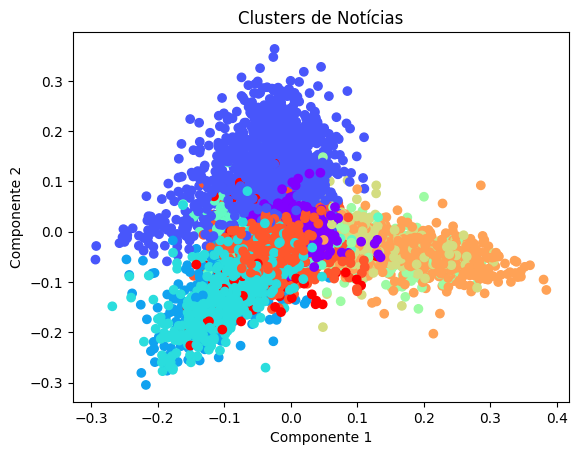

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from scipy.sparse import vstack

# Inicializando o TfidfVectorizer com 1000 features, pois o conjunto todo é muito grande e resulta em sobrecarga de memória 
vectorizer = TfidfVectorizer(max_features=1000)

# Processamento em partes menores (Chunking) para evitar sobrecarregar a memória.
chunk_size = 1000 
chunks = [cleaned_texts['Text'][i:i + chunk_size] for i in range(0, cleaned_texts.shape[0], chunk_size)]

# Cada parte é transformada usando o TfidfVectorizer.
tfidf_chunks = [vectorizer.fit_transform(chunk) for chunk in chunks]
x = vstack(tfidf_chunks)

# Utilizando o MiniBatchKMeans, que é uma variação de K-means projetada para trabalhar com grandes conjuntos de dados. 
# Ele processa os dados em mini-batches, reduzindo o uso de memória.
num_clusters = 10
kmeans = MiniBatchKMeans(n_clusters= num_clusters, random_state=0, batch_size=chunk_size).fit(x)

# # Adicionando os rótulos dos clusters ao DataFrame original
cleaned_texts['Cluster'] = kmeans.labels_

print(cleaned_texts)

# Visualizando os clusters com PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x.toarray())

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('Clusters de Notícias')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.savefig('images/clusterizacao.png', dpi=300)
plt.show()